In [24]:
import xarray
import geopandas

In [8]:
url = (
    "https://s5phub.copernicus.eu/dhus/odata/v1/"\
    "Products('3a64d725-bb5f-45d2-91fc-f54053c90ded')/$value"
)
url

"https://s5phub.copernicus.eu/dhus/odata/v1/Products('3a64d725-bb5f-45d2-91fc-f54053c90ded')/$value"

In [10]:
da = xarray.open_dataset(
    "S5P_NRTI_L2__NO2____20210210T133730_20210210T134230_17254_01_010400_20210210T142743.nc",
    group = "PRODUCT"
)

In [27]:
mad = geopandas.read_file("neighbourhoods.geojson")
x0, y0, x1, y1 = mad.total_bounds

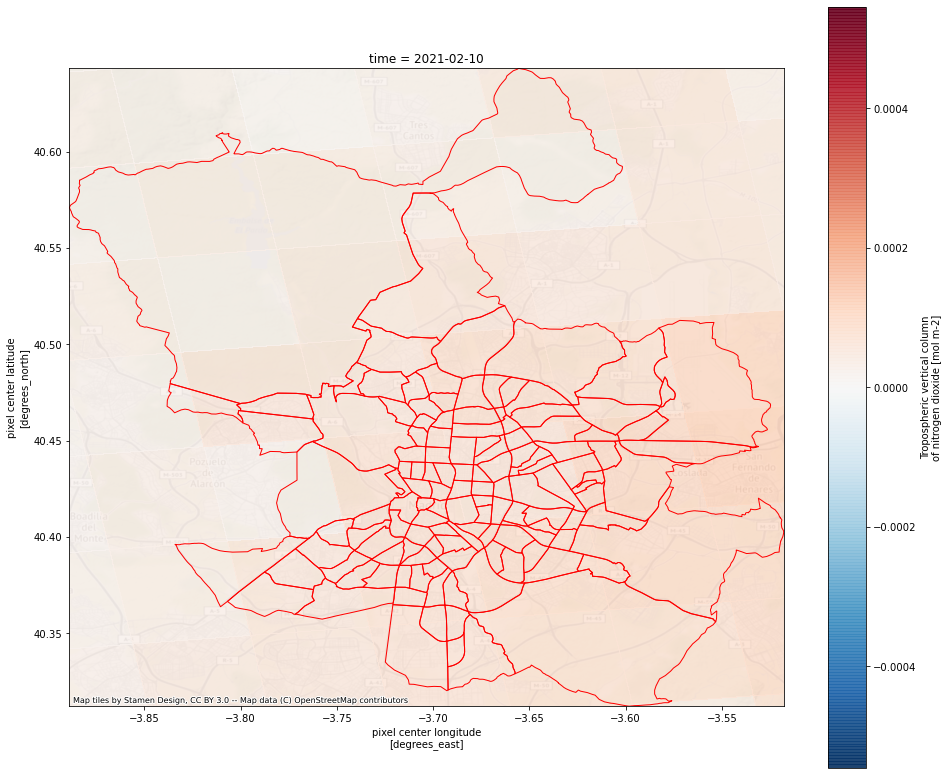

In [47]:
import matplotlib.pyplot as plt
import contextily as cx

f, ax = plt.subplots(1, figsize=(16, 14))
da["nitrogendioxide_tropospheric_column"].plot(x="longitude", y="latitude", alpha=0.9, ax=ax, zorder=1)
mad.plot(ax=ax, edgecolor='red', facecolor="none")
ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))
cx.add_basemap(ax, crs="EPSG:4326")


In [21]:
da["nitrogendioxide_tropospheric_column_precision"]

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (time: 1, scanline: 373, ground_pixel: 450)>
[167850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 369.0 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2021-02-10
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [7]:
da.attrs

{'Conventions': 'CF-1.7',
 'institution': 'KNMI',
 'source': 'Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2',
 'history': '2021-02-10 14:32:01 f_s5pops tropnll2dp /mnt/data1/storage_nrt/cache_nrt/WORKING-629198906/JobOrder.629197863.xml',
 'summary': 'TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km',
 'tracking_id': 'c159d130-e88f-4142-9ea2-36c51c36b16a',
 'id': 'S5P_NRTI_L2__NO2____20210210T133730_20210210T134230_17254_01_010400_20210210T142743',
 'time_reference': '2021-02-10T00:00:00Z',
 'time_reference_days_since_1950': 25973,
 'time_reference_julian_day': 2459255.5,
 'time_reference_seconds_since_1970': 1612915200,
 'time_coverage_start': '2021-02-10T13:37:24Z',
 'time_coverage_end': '2021-02-10T13:42:37Z',
 'time_coverage_duration': 'PT312.473S',
 'time_coverage_resolution': 'PT0.840S',
 'orbit': 17254,
 'references': 'http://www.tropomi.eu/data-products/nitrogen-dioxide',
 'processor_version': '1.4.0',
 'keywords_vocabulary': 'AGU index terms, http://publications.agu.or

In [ ]:
https://s5phub.copernicus.eu/dhus/odata/v1/Products('3a64d725-bb5f-45d2-91fc-f54053c90ded')/$value